In [10]:
import csv
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from numpy import reshape
import seaborn as sns

In [44]:
#dtm1 = pd.read_csv("DTM1.csv")
dtm2 = pd.read_csv("DTM2.csv")
dtm3 = pd.read_csv("DTM3.csv")

In [35]:
df_first = pd.read_csv("/Users/dianadanilenko/Desktop/methods/python_scripts/data/df_first_1804.csv")
df_last = pd.read_csv("/Users/dianadanilenko/Desktop/methods/python_scripts/data/df_last_1804.csv")
df_maj = pd.read_csv("/Users/dianadanilenko/Desktop/methods/python_scripts/data/df_maj_1804.csv")

In [46]:
dtm2.drop(['Unnamed: 0', 'docnum'], axis=1, inplace=True)

In [48]:
dtm3['sum'] = np.nan

In [50]:
cols_to_search2 = [col for col in dtm2.columns if col not in ['sum', 'meta']]
cols_to_search3 = [col for col in dtm3.columns if col not in ['sum', 'meta']]
#dtm1['highestscoretopic'] = dtm1[cols_to_search].idxmax(axis=1)
dtm2['highestscoretopic'] = dtm2[cols_to_search2].idxmax(axis=1)
dtm3['highestscoretopic'] = dtm3[cols_to_search3].idxmax(axis=1)
# now we'll have to group these by coordinates and choose a most common topic

In [51]:
#climatejusticetopics1 = ["Topic48","Topic33","Topic71","Topic35","Topic80","Topic51","Topic64"]
climatejusticetopics2 = ["Topic95","Topic33","Topic72","Topic91","Topic83","Topic51","Topic93","Topic64"]
climatejusticetopics3 = ["Topic79","Topic71","Topic50","Topic13","Topic20","Topic65","Topic86","Topic43"]
#dtm1['sum'] = dtm1[climatejusticetopics1].sum(axis=1)
dtm2['sum'] = dtm2[climatejusticetopics1].sum(axis=1)
dtm3['sum'] = dtm3[climatejusticetopics1].sum(axis=1)

In [25]:
display(dtm1)

,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,...,Topic84,Topic85,Topic86,Topic87,Topic88,Topic89,Topic90,meta,sum,highestscoretopic
0,0.001500,0.000212,0.004247,0.000167,0.002764,0.015367,0.010567,0.002263,0.018171,0.000837,...,0.001158,0.000302,0.001682,0.001470,0.088008,0.001880,0.001690,157,0.342935,Topic48
1,0.020526,0.002584,0.002520,0.000107,0.088972,0.000183,0.001384,0.001781,0.045429,0.000564,...,0.001554,0.000455,0.004578,0.000150,0.001669,0.001465,0.000906,300,0.009175,Topic62
2,0.001931,0.000277,0.002125,0.000200,0.003017,0.001478,0.003613,0.001091,0.053185,0.001100,...,0.005288,0.001425,0.001404,0.000663,0.018758,0.001853,0.002788,332,0.107349,Topic78
3,0.047843,0.000280,0.001047,0.000210,0.002297,0.003863,0.004918,0.000281,0.072479,0.004699,...,0.000979,0.000071,0.000202,0.000686,0.051839,0.001412,0.001700,694,0.193290,Topic55
4,0.153474,0.000277,0.001399,0.000021,0.003233,0.001281,0.010351,0.000932,0.030139,0.000662,...,0.000879,0.000329,0.001257,0.000374,0.023124,0.000615,0.002131,880,0.093375,Topic1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31417,0.000916,0.000910,0.000904,0.001086,0.006131,0.002216,0.004779,0.001314,0.072372,0.000614,...,0.001392,0.000306,0.012793,0.004646,0.006318,0.031978,0.002684,98435,0.211939,Topic21
31418,0.001493,0.001024,0.002873,0.000541,0.003686,0.029670,0.003996,0.000441,0.039887,0.001558,...,0.001475,0.003816,0.002090,0.000968,0.013375,0.014430,0.002984,98471,0.202991,Topic64
31419,0.001416,0.000311,0.005276,0.000627,0.003650,0.002105,0.002704,0.000149,0.119281,0.000436,...,0.000315,0.000652,0.001791,0.000862,0.003717,0.007207,0.002328,99032,0.557903,Topic33
31420,0.001285,0.000803,0.002491,0.000222,0.028963,0.003586,0.017938,0.002210,0.028981,0.003124,...,0.001484,0.000245,0.000079,0.048132,0.023918,0.001941,0.003764,99515,0.062321,Topic24


In [28]:
tsne = TSNE(n_components=2, verbose=1, random_state=7, angle=.99, init="pca")
cols_to_exclude = ['meta','sum','highestscoretopic']
# 100-D -> 2-D
tsne_results1 = tsne.fit_transform(dtm1.loc[:, ~dtm1.columns.isin(cols_to_exclude)]) 
# check that this array follows the same order as dtm rows 

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 31422 samples in 0.004s...
[t-SNE] Computed neighbors for 31422 samples in 23.844s...
[t-SNE] Computed conditional probabilities for sample 1000 / 31422
[t-SNE] Computed conditional probabilities for sample 2000 / 31422
[t-SNE] Computed conditional probabilities for sample 3000 / 31422
[t-SNE] Computed conditional probabilities for sample 4000 / 31422
[t-SNE] Computed conditional probabilities for sample 5000 / 31422
[t-SNE] Computed conditional probabilities for sample 6000 / 31422
[t-SNE] Computed conditional probabilities for sample 7000 / 31422
[t-SNE] Computed conditional probabilities for sample 8000 / 31422
[t-SNE] Computed conditional probabilities for sample 9000 / 31422
[t-SNE] Computed conditional probabilities for sample 10000 / 31422
[t-SNE] Computed conditional probabilities for sample 11000 / 31422
[t-SNE] Computed conditional probabilities for sample 12000 / 31422
[t-SNE] Computed conditional probabilities for sa

In [52]:
tsne_results2 = tsne.fit_transform(dtm2.loc[:, ~dtm2.columns.isin(cols_to_exclude)]) 
tsne_results3 = tsne.fit_transform(dtm3.loc[:, ~dtm3.columns.isin(cols_to_exclude)]) 

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 32873 samples in 0.002s...
[t-SNE] Computed neighbors for 32873 samples in 19.042s...
[t-SNE] Computed conditional probabilities for sample 1000 / 32873
[t-SNE] Computed conditional probabilities for sample 2000 / 32873
[t-SNE] Computed conditional probabilities for sample 3000 / 32873
[t-SNE] Computed conditional probabilities for sample 4000 / 32873
[t-SNE] Computed conditional probabilities for sample 5000 / 32873
[t-SNE] Computed conditional probabilities for sample 6000 / 32873
[t-SNE] Computed conditional probabilities for sample 7000 / 32873
[t-SNE] Computed conditional probabilities for sample 8000 / 32873
[t-SNE] Computed conditional probabilities for sample 9000 / 32873
[t-SNE] Computed conditional probabilities for sample 10000 / 32873
[t-SNE] Computed conditional probabilities for sample 11000 / 32873
[t-SNE] Computed conditional probabilities for sample 12000 / 32873
[t-SNE] Computed conditional probabilities for sa

In [32]:
display(tsne_results3)

array([[  2.367215 ,  -5.1932216],
       [-13.431983 , -54.65523  ],
       [ 16.1537   , -16.996185 ],
       ...,
       [ 14.820707 ,  24.98012  ],
       [-11.51479  , -40.91162  ],
       [ -1.8391073,  37.963074 ]], dtype=float32)

In [36]:
df1 = pd.DataFrame()
df1["id"] = dtm1["meta"]
df1["comp-1"] = tsne_results1[:,0]
df1["comp-2"] = tsne_results1[:,1]
df1 = pd.merge(df1, df_first[["id","first_author_female"]], on="id", how='left')

In [53]:
df2 = pd.DataFrame()
df2["id"] = dtm2["meta"]
df2["comp-1"] = tsne_results2[:,0]
df2["comp-2"] = tsne_results2[:,1]
df2 = pd.merge(df2, df_last[["id","last_author_female"]], on="id", how='left')

In [54]:
df3 = pd.DataFrame()
df3["id"] = dtm3["meta"]
df3["comp-1"] = tsne_results3[:,0]
df3["comp-2"] = tsne_results3[:,1]
df3 = pd.merge(df3, df_maj[["id","majority_female_binary"]], on="id", how='left')

In [37]:
dtm1.rename(columns = {"meta":"id"}, inplace=True)
df1 = pd.merge(df1, dtm1[["id","highestscoretopic","sum"]], on="id", how='left')
df1.rename(columns = {"highestscoretopic":"topic", "sum":"climatejusticescore"}, inplace=True)
display(df1)

,id,comp-1,comp-2,first_author_female,topic,climatejusticescore
0,157,52.550190,13.704720,0.0,Topic48,0.342935
1,300,-21.306911,-23.298317,0.0,Topic62,0.009175
2,332,-2.871118,8.239209,1.0,Topic78,0.107349
3,694,25.785948,11.473897,1.0,Topic55,0.193290
4,880,25.115221,-29.070986,0.0,Topic1,0.093375
...,...,...,...,...,...,...
31417,98435,31.329865,-28.850069,0.0,Topic21,0.211939
31418,98471,-6.011520,4.903882,0.0,Topic64,0.202991
31419,99032,23.377766,-21.605757,1.0,Topic33,0.557903
31420,99515,20.373291,-46.996990,0.0,Topic24,0.062321


In [55]:
dtm2.rename(columns = {"meta":"id"}, inplace=True)
df2 = pd.merge(df2, dtm2[["id","highestscoretopic","sum"]], on="id", how='left')
df2.rename(columns = {"highestscoretopic":"topic", "sum":"climatejusticescore"}, inplace=True)

dtm3.rename(columns = {"meta":"id"}, inplace=True)
df3 = pd.merge(df3, dtm3[["id","highestscoretopic","sum"]], on="id", how='left')
df3.rename(columns = {"highestscoretopic":"topic", "sum":"climatejusticescore"}, inplace=True)

In [56]:
#df1.to_csv("tsne1.csv")
df2.to_csv("tsne2.csv")
df3.to_csv("tsne3.csv")

[Text(0.5, 1.0, 'T-SNE visualisation of STM')]

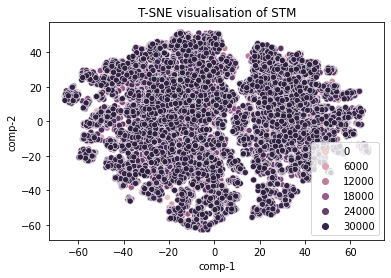

In [21]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                data=df).set(title="t-SNE visualisation of STM") 

In [17]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", len(df["y"])),
                data=df).set(title="T-SNE visualisation of STM") 

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fbfd1c55310> (for post_execute):


KeyboardInterrupt: 